In [1]:
%pylab inline
import pandas as pd
from dateparser import parse
from tqdm import tqdm

from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [7]:
ex = pd.ExcelFile('WDImetadata.xlsx')
explainer = ex.parse('2010-2019 MetaData').set_index('Code').fillna('')
def explain(c, topic='Long definition'):
    global explainer
    return explainer.loc[c][topic]

'Mortality rate, infant (per 1,000 live births)'

In [2]:
idxs = ['Country Code','Custom_Time_Code']
features = ['SP.DYN.IMRT.IN',
            'SP.ADO.TFRT',
            'VC.IHR.PSRC.P5',
            'SI.POV.GINI',
            'NY.GDP.PCAP.CD',
            'SE.PRM.TENR',
            'SE.PRM.TENR.FE',
            'SE.PRM.TENR.MA',
            'EN.ATM.GHGT.KT.CE',
            'EG.USE.ELEC.KH.PC',
            'EG.ELC.ACCS.ZS']

In [106]:
df = pd.read_csv('cleaned.csv', parse_dates=['Custom_Time_Code'])
df = df[df['Country Code'] != 'USA']

In [108]:
df_2010 = df[df['Custom_Time_Code'] > parse('Jan 1st 2009')]
data = df_2010.iloc[:, 2:]


In [109]:
import itertools as it

In [5]:
to_scatter = [(i,j) for i,j in it.product(features, features) if i!=j]

for i,j in to_scatter:
    df[features].plot.scatter(x=i, y=j)
    plt.ylabel(explain(j, topic='Indicator Name'))
    plt.xlabel(explain(i, topic='Indicator Name'))
    plt.show()

In [110]:
i,j = to_regress[0]

In [111]:
corr = data.corr('pearson')

In [112]:
((corr.abs() > .8)&(corr.abs() < 1)).sum().sum()

32802

In [113]:
corr

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,SE.PRM.TENR,SE.PRM.TENR.FE,SE.PRM.TENR.MA,NY.ADJ.NNTY.KD.ZG,NY.ADJ.NNTY.KD,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.KD.ZG,...,SL.EMP.VULN.FE.ZS,SL.EMP.VULN.MA.ZS,SL.EMP.VULN.ZS,SL.EMP.WORK.FE.ZS,SL.EMP.WORK.MA.ZS,SL.EMP.WORK.ZS,SP.DYN.WFRT,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SH.DYN.AIDS.FE.ZS
EG.ELC.ACCS.ZS,1.000000,0.956613,0.870984,0.396988,0.352299,0.338887,-0.036977,0.231532,0.234024,0.100828,...,-0.709165,-0.708278,-0.732140,0.705722,0.705949,0.730044,-0.674917,-0.500652,-0.593891,-0.713885
EG.ELC.ACCS.RU.ZS,0.956613,1.000000,0.773721,0.400818,0.349746,0.335045,-0.106848,0.242415,0.245973,0.034744,...,-0.715683,-0.691162,-0.724151,0.713751,0.691881,0.724314,-0.684640,-0.507767,-0.572523,-0.728204
EG.ELC.ACCS.UR.ZS,0.870984,0.773721,1.000000,0.417452,0.365153,0.374726,0.026363,0.207725,0.215486,0.143111,...,-0.552402,-0.545686,-0.573289,0.550980,0.544452,0.572124,-0.613825,-0.418806,-0.521427,-0.628025
SE.PRM.TENR,0.396988,0.400818,0.417452,1.000000,0.939144,0.937896,0.147073,0.127555,0.124657,0.209097,...,-0.387958,-0.388407,-0.387751,0.384821,0.399911,0.394479,-0.448625,-0.377628,-0.408296,-0.281802
SE.PRM.TENR.FE,0.352299,0.349746,0.365153,0.939144,1.000000,0.942333,0.130916,0.130845,0.130600,0.190742,...,-0.365982,-0.389149,-0.384379,0.363026,0.402836,0.392095,-0.438890,-0.326714,-0.372824,-0.211581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SL.EMP.WORK.ZS,0.730044,0.724314,0.572124,0.394479,0.392095,0.308284,-0.068336,0.028125,0.024384,0.068090,...,-0.969601,-0.970044,-0.994312,0.966861,0.980025,1.000000,-0.636685,-0.548448,-0.641523,-0.562390
SP.DYN.WFRT,-0.674917,-0.684640,-0.613825,-0.448625,-0.438890,-0.351258,0.176551,-0.244820,-0.246787,-0.015224,...,0.615800,0.625152,0.638091,-0.609088,-0.624864,-0.636685,1.000000,0.574494,0.626960,0.537903
SP.M15.2024.FE.ZS,-0.500652,-0.507767,-0.418806,-0.377628,-0.326714,-0.236890,-0.071306,-0.077247,-0.067169,-0.154413,...,0.550148,0.526732,0.535281,-0.548128,-0.546663,-0.548448,0.574494,1.000000,0.921558,0.274205
SP.M18.2024.FE.ZS,-0.593891,-0.572523,-0.521427,-0.408296,-0.372824,-0.285193,-0.031914,-0.089269,-0.078498,-0.126293,...,0.640882,0.609010,0.624823,-0.639607,-0.634308,-0.641523,0.626960,0.921558,1.000000,0.351956


In [114]:
corr.loc['EG.ELC.ACCS.ZS', 'EG.ELC.ACCS.RU.ZS']

0.9566126209568723

In [115]:
visited = set()
r_values = []
for i,j in tqdm(it.product(data.columns, data.columns)):
    i_prefix = i.split('.')[0]
    j_prefix = j.split('.')[0]
    if (i!=j) and (i_prefix != j_prefix) and ((j,i) not in visited):
        r = corr.loc[i, j]
        r_values.append((r, i, j))
        visited.add((i,j))

879844it [00:11, 73487.14it/s] 


In [118]:
between_set_corr = pd.DataFrame.from_records(r_values)

between_set_corr.columns = ['r', 'i', 'j']

between_set_corr[between_set_corr.r.abs() > .9].sort_values('r')

In [119]:
explain('FM.AST.DOMS.CN')

'Net domestic credit is the sum of net claims on the central government and claims on other sectors of the domestic economy (IFS line 32). Data are in current local currency.'

In [120]:
explain('NY.GDS.TOTL.ZS')

'Gross domestic savings are calculated as GDP less final consumption expenditure (total consumption).'

100%|██████████| 1999/1999 [00:06<00:00, 306.00it/s]


Text(0.5, 1.0, 'Clustering of R-values')

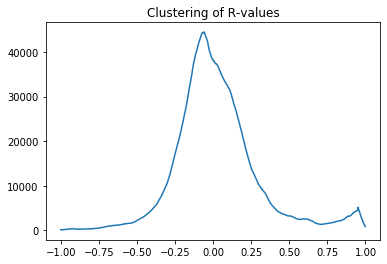

In [121]:
start = -1
stop = 1
delta = .001
range_ = np.arange(start,stop-delta, delta)

count = []

for i in tqdm(range_):
    count.append(between_set_corr.r.between(i, i+.05).sum())

ct = pd.Series(count)
ct.index = range_
ct.plot()
plt.title('Clustering of R-values')

100%|██████████| 249/249 [00:00<00:00, 261.08it/s]


Text(0.5, 1.0, 'Clustering of R-values')

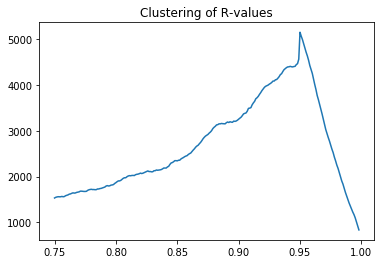

In [122]:
start = .75
stop = 1
delta = .001
range_ = np.arange(start,stop-delta, delta)

count = []

for i in tqdm(range_):
    count.append(between_set_corr.r.between(i, i+.05).sum())

ct = pd.Series(count)
ct.index = range_
ct.plot()
plt.title('Clustering of R-values')

In [123]:
between_set_corr[between_set_corr.r.abs().between(.8, .92)].groupby('i')['j'].count().sort_values()

i
SP.DYN.IMRT.MA.IN      1
IT.MLT.MAIN.P2         1
IS.RRS.GOOD.MT.K6      1
GC.XPN.TRFT.CN         1
GC.TAX.YPKG.CN         1
                    ... 
IS.AIR.PSGR           91
MS.MIL.MPRT.KD        96
BN.CAB.XOKA.CD       105
IS.AIR.GOOD.MT.K1    106
MS.MIL.TOTL.P1       113
Name: j, Length: 310, dtype: int64

In [124]:
between_set_corr[between_set_corr.r.abs().between(.8, .92) & (between_set_corr.i == 'MS.MIL.TOTL.P1')]

,r,i,j
54207,0.856310,MS.MIL.TOTL.P1,AG.PRD.CREL.MT
54211,0.911660,MS.MIL.TOTL.P1,NE.GDI.STKB.CD
54212,0.904848,MS.MIL.TOTL.P1,BM.GSR.ROYL.CD
54213,0.900065,MS.MIL.TOTL.P1,BX.GSR.ROYL.CD
54229,0.859786,MS.MIL.TOTL.P1,EN.ATM.CO2E.KT
...,...,...,...
55013,0.897445,MS.MIL.TOTL.P1,FI.RES.XGLD.CD
55017,0.878708,MS.MIL.TOTL.P1,IP.TMK.RESD
55018,0.880130,MS.MIL.TOTL.P1,IP.TMK.TOTL
55041,0.864794,MS.MIL.TOTL.P1,AG.LND.TOTL.UR.K2


In [125]:
explain('MS.MIL.TOTL.P1', topic = 'Indicator Name')

'Armed forces personnel, total'

In [126]:
explain('NE.GDI.STKB.CD', topic='Indicator Name')

'Changes in inventories (current US$)'

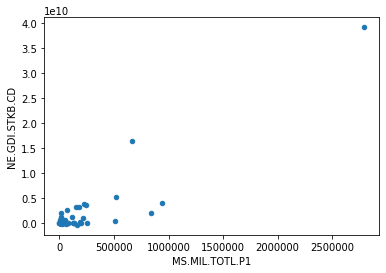

In [127]:
data.plot.scatter(x = 'MS.MIL.TOTL.P1', y = 'NE.GDI.STKB.CD')

In [134]:
df_2010[['Country Code','MS.MIL.TOTL.P1']].dropna().sort_values('MS.MIL.TOTL.P1')

,Country Code,MS.MIL.TOTL.P1
183,HTI,82.50
180,GMB,825.00
219,STP,1000.00
172,CPV,1175.00
225,TLS,1414.00
...,...,...
184,IDN,664375.00
174,EGY,835562.50
206,PAK,940125.00
209,PRK,1401500.00


In [142]:
def z_score(s):
    return (s-s.mean())/s.std()

In [227]:
data_z = pd.concat([z_score(data[col]) for col in tqdm(data.columns)], axis=1)
data_z.columns = data.columns

data_no_outliers = data.where(data_z.abs() < 2)
data_no_outliers.set_index(df_2010['Country Code'])

100%|██████████| 938/938 [00:01<00:00, 672.62it/s]


,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,SE.PRM.TENR,SE.PRM.TENR.FE,SE.PRM.TENR.MA,NY.ADJ.NNTY.KD.ZG,NY.ADJ.NNTY.KD,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.KD.ZG,...,SL.EMP.VULN.FE.ZS,SL.EMP.VULN.MA.ZS,SL.EMP.VULN.ZS,SL.EMP.WORK.FE.ZS,SL.EMP.WORK.MA.ZS,SL.EMP.WORK.ZS,SP.DYN.WFRT,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SH.DYN.AIDS.FE.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,72.696937,66.097716,93.412939,NaN,NaN,NaN,NaN,1.393045e+10,1.661862e+10,NaN,...,95.974698,86.489001,89.725300,3.8952,12.815700,9.772200,4.40,8.800000,36.000000,29.066667
AGO,37.128581,0.479294,70.420592,81.754230,73.063925,90.553025,NaN,4.144685e+10,5.186125e+10,NaN,...,80.692301,53.859200,67.235700,16.7592,40.217600,28.523100,5.20,7.900000,30.300000,68.966667
BDI,7.390622,0.994584,55.811980,94.821153,96.183163,93.467073,7.570536,1.635541e+09,1.836888e+09,4.206887,...,97.084700,91.958901,94.651000,2.8774,7.928500,5.275800,4.05,2.650000,19.700000,60.900000
BEN,38.216888,14.805125,66.931706,95.973890,NaN,NaN,3.776151,6.931506e+09,7.097935e+09,0.927793,...,94.607300,82.618099,88.510500,4.7336,15.521800,10.219700,4.45,8.966667,29.466667,60.000000
BFA,19.259105,5.276737,57.620602,71.050084,69.737219,72.316550,4.870623,8.612384e+09,8.329688e+09,1.807059,...,91.233600,84.992200,87.689500,8.4469,14.047800,11.626800,5.40,10.200000,51.600000,58.311111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,99.529949,99.338265,99.950112,98.935312,NaN,NaN,9.671458,1.210416e+11,1.418749e+11,8.545052,...,65.352300,53.059100,58.989200,33.0886,43.476600,38.465599,1.30,0.900000,9.950000,31.000000
VUT,44.876321,30.578934,88.277851,92.147720,92.549080,91.777250,3.969437,6.558903e+08,6.919603e+08,1.169860,...,75.395201,67.537399,70.951400,23.5516,30.652100,27.567000,NaN,2.500000,21.400000,NaN
YEM,71.742725,58.632199,97.554039,84.501937,77.330967,91.401503,NaN,2.329219e+10,3.164722e+10,NaN,...,64.867001,41.823000,43.675400,32.8193,50.705500,49.266700,3.10,9.400000,32.100000,25.200000


In [171]:
corr_no_outliers = data_no_outliers.corr('pearson')

In [172]:
visited = set()
r_values = []
for i,j in tqdm(it.product(data.columns, data.columns)):
    i_prefix = i.split('.')[0]
    j_prefix = j.split('.')[0]
    if (i!=j) and (i_prefix != j_prefix) and ((j,i) not in visited):
        r = corr.loc[i, j]
        r_values.append((r, i, j))
        visited.add((i,j))

879844it [00:12, 71612.09it/s] 


In [175]:
between_set_corr = pd.DataFrame.from_records(r_values)

between_set_corr.columns = ['r', 'i', 'j']

100%|██████████| 1999/1999 [00:05<00:00, 361.22it/s]


Text(0.5, 1.0, 'Clustering of R-values (Outliers Removed)')

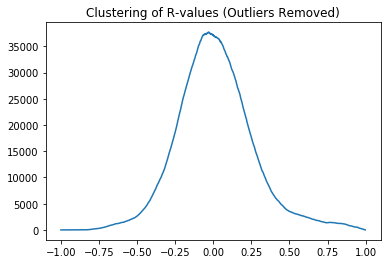

In [174]:
start = -1
stop = 1
delta = .001
range_ = np.arange(start,stop-delta, delta)

count = []

for i in tqdm(range_):
    count.append(between_set_corr.r.between(i, i+.05).sum())

ct = pd.Series(count)
ct.index = range_
ct.plot()
plt.title('Clustering of R-values (Outliers Removed)')

In [177]:
between_set_corr[between_set_corr.r.abs().between(.8, .92)].sort_values('r')

,r,i,j
292662,-0.907764,SP.DYN.LE00.FE.IN,SH.DYN.MORT
292664,-0.905721,SP.DYN.LE00.FE.IN,SH.DYN.MORT.MA
163094,-0.903933,NE.RSB.GNFS.CN,PA.NUS.PRVT.PP
163093,-0.901639,NE.RSB.GNFS.CN,PA.NUS.PPP
117767,-0.898871,PA.NUS.ATLS,NE.RSB.GNFS.CN
...,...,...,...
203859,0.919711,NY.GNP.MKTP.CN,NV.IND.MANF.CN
201674,0.919735,NE.CON.GOVT.CD,BM.GSR.NFSV.CD
159916,0.919835,NE.EXP.GNFS.CN,NY.GDP.MKTP.CN
187177,0.919976,NY.GDP.MKTP.CD,NV.IND.MANF.KD


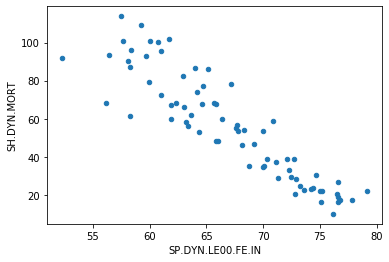

In [179]:
data_no_outliers.plot.scatter(x='SP.DYN.LE00.FE.IN', y='SH.DYN.MORT')

In [180]:
explain('SP.DYN.LE00.FE.IN')

'Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.'

In [181]:
explain('SH.DYN.MORT')

'Under-five mortality rate is the probability per 1,000 that a newborn baby will die before reaching age five, if subject to age-specific mortality rates of the specified year.'

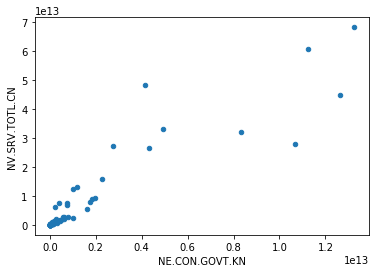

In [182]:
data_no_outliers.plot.scatter(x='NE.CON.GOVT.KN', y='NV.SRV.TOTL.CN')

In [185]:
explain('NE.CON.GOVT.KN', topic='Indicator Name')

'General government final consumption expenditure (constant LCU)'

In [188]:
explain('NV.SRV.TOTL.CN', topic='Indicator Name')

'Services, value added (current LCU)'

In [189]:
rs = between_set_corr[between_set_corr.r.abs().between(.8, .92)].sort_values('r')

In [199]:
knn_features = set(pd.concat([rs.iloc[:10], rs.iloc[-10:]]).iloc[:,1:].values.ravel())

In [206]:
from sklearn.cluster import KMeans

In [216]:
X = data_no_outliers[list(knn_features)].fillna(data_no_outliers.mean())

In [230]:
scores = []
for i in tqdm(range(2, 100)):
    kmeans = KMeans(n_clusters=i).fit(X)
    score = kmeans.score(X)
    scores.append(score)

 65%|██████▌   | 64/98 [00:16<00:15,  2.24it/s]

KeyboardInterrupt: 

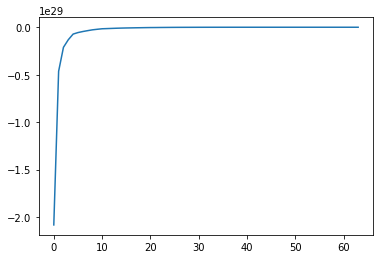

In [233]:
plt.plot(scores)

In [234]:
clustering = KMeans(n_clusters=5).fit(X)

In [247]:
data_no_outliers.index = df_2010['Country Code']
data_no_outliers['country'] = data_no_outliers.index
data_no_outliers['label'] = clustering.labels_

In [250]:
data_no_outliers.groupby('label').apply(lambda x: x.country.values)

label
0    [AGO, BGD, CIV, CMR, COD, IDN, MDG, MNG, PAK, ...
1                                                [VNM]
2        [GIN, IND, KHM, LAO, MMR, NGA, SOM, TZA, UGA]
3                                                [UZB]
4    [AFG, BDI, BEN, BFA, BOL, BTN, CAF, COG, COM, ...
dtype: object